In [22]:
import torch
torch.__version__

'1.12.1+cu113'

In [23]:
from torch import nn

## 1.Data(preparing and loading)


In [24]:
# Create parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets

In [25]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## 2.Build model

In [26]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x:torch.Tensor):
    return self.weights * x + self.bias

In [27]:
# Set manual seed 
torch.manual_seed(42)

# Create an instance of our model
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [30]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [31]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## 3.Model Training

In [36]:
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []


# Loop through data
for epoch in range(epochs):
  # Set training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Loss function
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer(zero_grad)(Get to zero)
  optimizer.zero_grad()

  # 4. Backword propagation
  loss.backward()

  # 5. Optimizers.step
  optimizer.step()

  ### Testing 
  
  # Set model evaluation mode
  model_0.eval()

  with torch.inference_mode():

    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epochs % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 1 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 2 | MAE Train Loss: 0.28983935713768005 | MAE Test Loss: 0.4541231691837311 
Epoch: 3 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.44065219163894653 
Epoch: 4 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.4271811842918396 
Epoch: 5 | MAE Train Loss: 0.2552763521671295 | MAE Test Loss: 0.41371020674705505 
Epoch: 6 | MAE Train Loss: 0.24375534057617188 | MAE Test Loss: 0.40023916959762573 
Epoch: 7 | MAE Train Loss: 0.23223432898521423 | MAE Test Loss: 0.3867681920528412 
Epoch: 8 | MAE Train Loss: 0.22071333229541779 | MAE Test Loss: 0.37329721450805664 
Epoch: 9 | MAE Train Loss: 0.20919232070446014 | MAE Test Loss: 0.3598262071609497 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 11 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842

In [ ]:
# epochs = 100

# epoch_count = []
# train_loss = []
# test_loss = []

# for epoch in range(epochs):

#   # Set training mode
#   model_0.train()

#   # Forward pass
#   y_pred = model_0(X_train)

#   # Loss function
#   loss = loss_fn(y_pred, y_train)

#   # optimizer to go zero_grad()
#   optimizer.zero_grad()

#   # loss backward
#   loss.backward()

#   # optimizer step
#   optimizer.step()

#   # Set testing model
#   model_0.eval()

#   with torch.inference_mode():
#     test_pred = model_0(X_test)

#     test_loss = loss_fn(test_pred, y_test)

#     if epochs % 10 == 0:
#       epoch_count.append(epoch)
#       train_loss.append(loss.detach().numpy())
#       test_loss.append(test_loss.detach().numpy())



## 4.Make Predictions

In [37]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

## 5.Saving and loading a PyTorch  model

In [39]:
from pathlib import Path 

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

print(f'Saving model to:{MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [ ]:
# from pathlib import Path

# model = Path('model')
# model.mkdir(parent=True, exist_ok=True)

# model_path = 'pytorch_1.pth'
# model_save_path = model/model_path

# torch.save(model_0.state_dict(), model_save_path)

In [42]:
load_model = LinearRegression()

load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [43]:
load_model.eval()
with torch.inference_mode():
  loaded_preds = load_model(X_test)
loaded_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

# EXERCISES

### 1.Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 
there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [54]:
w = 0.3
b = 0.9

start = 0.0
end = 100.0
step = 1.0

In [55]:
x = torch.arange(start, end, step)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
        84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97.,
        98., 99.])

In [56]:
len(x)

100

In [57]:
y = w*x + b
y

tensor([ 0.9000,  1.2000,  1.5000,  1.8000,  2.1000,  2.4000,  2.7000,  3.0000,
         3.3000,  3.6000,  3.9000,  4.2000,  4.5000,  4.8000,  5.1000,  5.4000,
         5.7000,  6.0000,  6.3000,  6.6000,  6.9000,  7.2000,  7.5000,  7.8000,
         8.1000,  8.4000,  8.7000,  9.0000,  9.3000,  9.6000,  9.9000, 10.2000,
        10.5000, 10.8000, 11.1000, 11.4000, 11.7000, 12.0000, 12.3000, 12.6000,
        12.9000, 13.2000, 13.5000, 13.8000, 14.1000, 14.4000, 14.7000, 15.0000,
        15.3000, 15.6000, 15.9000, 16.2000, 16.5000, 16.8000, 17.1000, 17.4000,
        17.7000, 18.0000, 18.3000, 18.6000, 18.9000, 19.2000, 19.5000, 19.8000,
        20.1000, 20.4000, 20.7000, 21.0000, 21.3000, 21.6000, 21.9000, 22.2000,
        22.5000, 22.8000, 23.1000, 23.4000, 23.7000, 24.0000, 24.3000, 24.6000,
        24.9000, 25.2000, 25.5000, 25.8000, 26.1000, 26.4000, 26.7000, 27.0000,
        27.3000, 27.6000, 27.9000, 28.2000, 28.5000, 28.8000, 29.1000, 29.4000,
        29.7000, 30.0000, 30.3000, 30.60

In [52]:
len(y)

100

In [53]:
len(x)

100

In [58]:
train_split = int(0.8*len(x))
X_train, y_train = x[:train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test),len(y_test)

(80, 80, 20, 20)

In [60]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

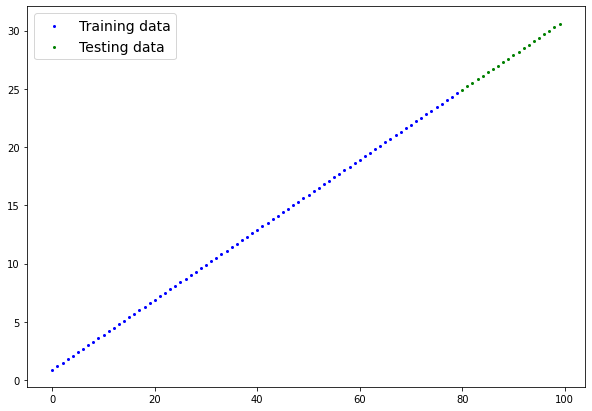

In [61]:
plot_predictions();

### 2.Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
* Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [63]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  
  def forward(self, x):
    return self.weights * x + self.bias

In [67]:
torch.manual_seed(42)
li = LinearRegression()
li.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [69]:
list(li.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

### 3.Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [70]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optim = torch.optim.SGD(params=li.parameters(),
                        lr=0.01)

In [73]:
epochs = 300

epoch_count = []
train_loss = []
test_loss_values = []

for epoch in range(epochs):

  # Set training model
  li.train()

  # Forward pass
  y_pred = li(X_train)

  # Loss fun
  loss = loss_fn(y_pred, y_pred)

  # optimizer(zero_grad)
  optim.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optim.step()

  # Testing mode
  li.eval()
  
  with torch.inference_mode():
    test_pred = li(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epochs % 20 == 0:
      epoch_count.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 1 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 2 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 3 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 4 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 5 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 6 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 7 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 8 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 9 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 10 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 11 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 12 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 13 | MAE Train Loss: 0.0 | MAE Test Loss: 2.512596607208252 
Epoch: 14 | MAE Train Loss: 0.0 | MAE Test Loss: 2.5125966

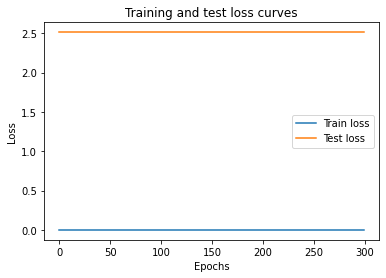

In [74]:
# Plot the loss curves
plt.plot(epoch_count, train_loss, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();